## Homework 4 Classification I

The Homework aims to use the Bank Marketing dataset to perform k-Nearest Neighbors (k-NN) and Support Vector Machine (SVM) classification algorithms. Python 3.7.1 was used for this purpose.

The file bank-additional.zip taken from [1] contains two .csv file (bank-additional.csv and bank-additional-full.csv) and the data set documentation (bank-additional-names.txt). The file bank-additional-full.csv was used as the data source and the documentation was used to understand the dataset's contents and to identify the column labels.

The pandas [2] and scikit learn [3] documentation was used as a guide to solve the problems presented in Homework 3. Previously courses taken at DataCamp [4] were also helpful in solving the homework.


## Libraries used
- Pandas was imported to handle the dataframes.

- Scikit Learn: This is an open-source machine learning library for Python and contains a helpful preprocessing module that can help us do the normalization and standardization

- Seaborn was used to build the plot.

In [1]:
##--Importing necessary libraries
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

##--Disabling the warnings for better notebook visibility
import warnings
warnings.simplefilter('ignore') 

##--Setting SNS palette and parameters
sns.set(style='whitegrid', palette='Set1')
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Loading the File
The dataset was inspected and it was noticed that it is stored as a comma separated values (csv) file and each value is separated by a semi-colon (;). The file contains a header with the column names. 

The file was taken directly from the dataset url and loaded as a pandas dataframe with parameters for the header and the delimiter were specified to 0 and ";" respectively. The first 5 rows can be seen in the table below.

In [2]:
##--Reading the file

#Read the file
df = pd.read_csv('bank-additional/bank-additional-full.csv', header = 0, delimiter = ";")
# df = pd.read_csv('bank/bank-full.csv', header = 0, delimiter = ";")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The dataset is related to the direct marketing campaigns based on phone calls of a banking institution located in Portugal. The dataset contains 45211 instances and 16 client and contact attributes. The goal attribute (variable y) describes if the client will subscribe a term deposit.

## Data Cleaning and Preprocessing
The dataframe has missing values denoted as “unknown” that have to be changed to Not a number (NaN) for an easier analysis. 

In [3]:
#Replacing the 'unknown' entries with NaN values so they can be counted
df = df.replace(to_replace = 'unknown', value = np.nan)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


It can be seen in the information above that there is not a variable with a significant number of missing values. 

The documentation found in [1] states that the duration column is not known before a call is performed then it should be used for benchmark purposes only and it is advised to discard this column.

The other features that contain missing values are “job”, “education” and “contact”. Replacing the missing values of these attributes with the mean would not make sense since these are unordered categorical values, and therefore they are replaced with the mode.

In [4]:
# Dropping "poutcome" and "duration"
df.drop(columns = ['duration'],  inplace=True)

df = df.replace(to_replace = np.nan, value = df.mode())

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Categorical Data Encoding
The dataset contains categorical features but the kNN and SVM classification models don’t handle categorical features. To solve this, some kind of encoding to turn them into numerical attributes needs to be used. 

In this case, the variables 'job', 'marital', 'default', 'housing', 'loan', 'contact','poutcome' were encoded giving a unique number to each of its possible values without a logical order other than ordering alphabetically. ‘education’ was encoded following the complexity of education beginning with illiterate and finishing with university degree. The ‘month’ and ‘day_of_week’ were encoded in chronological order.

In [5]:
# #Encoding Marital, Job with one hot encoder
# df_encode = df.copy()

# onehotencoder2 = preprocessing.OneHotEncoder()
# enc = job = onehotencoder2.fit_transform(df_encode[['job', 'marital']]).toarray()

# col_job = np.unique(df_encode['job'])
# col_marital = np.unique(df_encode['marital'])

# # job, marital, contact, day, month, poutcome

In [6]:
#Encoding job, martial, default, housing, loan, contact with labelencoder
df_encode = df.copy()
labelencoder_df = preprocessing.LabelEncoder()
feas = ('job', 'marital', 'default', 'housing', 'loan', 'contact','poutcome')
for item in feas:
    df_encode[item]=labelencoder_df.fit_transform(df_encode[item])

In [7]:
#Encoding Education
education = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, 
             "high.school":4,"professional.course":5, "university.degree":6}
df_encode['education'] = df_encode['education'].map(education)

In [8]:
#Encoding Month in the order of the months
ord_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
          'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec':12}

df_encode['month'] = df_encode['month'].map(ord_map)

ord_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6,
          'sun': 7}

df_encode['day_of_week'] = df_encode['day_of_week'].map(ord_map)

df_encode[df['y']=='no'].count() #36548 samples with 'y'='no'
df_encode[df['y']=='yes'].count() #4640 samples with 'y'='yes'
df_encode.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,4,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,4,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,2,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,4,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


## Splitting Data
Choosing the splitting data ratio is a difficult task. A training set that is too small would underfit the model due to the lack of information and a small testing set would not be robust enough to test every possible scenario. For big datasets, 80/20 is quite a commonly occurring ratio and is referred to as the Pareto principle.

In [9]:
X = df_encode.iloc[:, :-1].values
y = df_encode.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 2)

# Feature Scaling
sc = StandardScaler()
cols = df_encode.columns
cols = cols[:-1] 
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(sc.transform(X_test), columns=cols)

df_z=pd.concat((pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['y'])), axis=1)

## Classification models

In the present homework two machine learning techniques were used to create a classification model: k-Nearest Neighbor (kNN) and Support Vector Machine (SVM). 

It is worth to be mentioned that in binary classification problems, the accuracy which is a frequently used measurement of performance can be misleading if one class is much more common than another. In this exercise the classes are unbalanced having more than 36,500 samples (88.8%) with a ‘no’ class and only ‘4640’ samples (12%) in the class ‘yes’.

Besides accuracy, other measures that can be analyzed are:
-	Precision: Explains how many of those predicted positive are actual positive values. 
-	Recall: Explains how many of the actual positive values were predicted as positive.
-	F1 score: is a function of precision and recall and tries to balance these two [koo ping].


### kNN Classifier

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

df_knn=pd.concat((pd.DataFrame(X_test), pd.DataFrame(y_pred_knn, columns=['y'])), axis=1)

err = (y_test != y_pred_knn).sum()/len(y_test)
acc = 1-err
print("The accuracy of the kNN model is " + str(round(acc,2)) + 
      " and the error is " + str(round(err,2)) + "\n" + "  'no'  'yes'")

#Evaluating
print(metrics.confusion_matrix(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))
# , target_names=set(y)

The accuracy of the kNN model is 0.89 and the error is 0.11
  'no'  'yes'
[[7086  224]
 [ 669  259]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.54      0.28      0.37       928

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238



kNN classifier was trained using 5 neighbors. The model obtained an accuracy of 0.89 with a related error of 0.11 but, as it was mentioned previously, due to the dataset being highly unbalanced, this is not a good measure of the model’s performance. 

In this exercise, the precision, recall and F1-score will be studied as they are better in the evaluation of the model. In this case, precision was 0.91 and 0.54, recall 0.97 and 0.28 and f1-score was 0.94 and 0.37 for classes ‘no’ and ‘yes’ respectively.

### SVM

Linear Support Vector Classification.

In [11]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svc = classifier.predict(X_test)

df_svc=pd.concat((pd.DataFrame(X_test), pd.DataFrame(y_pred_svc, columns=['y'])), axis=1)

err = (y_test != y_pred_svc).sum()/len(y_test)
acc = 1-err
print("The accuracy of the SVM model is " + str(round(acc,2)) + 
      " and the error is " + str(round(err,2)) + "\n" + " 'no'  'yes'")

# Evaluating
print(metrics.confusion_matrix(y_test, y_pred_svc))
print(metrics.classification_report(y_test, y_pred_svc))

The accuracy of the SVM model is 0.9 and the error is 0.1
 'no'  'yes'
[[7209  101]
 [ 742  186]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7310
         yes       0.65      0.20      0.31       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



The Support Vector Machine model had the same or a better performance than kNN for both classes except for the recall of the ‘yes’ class. This might be to the fact that kNN classifies the samples by comparing them with similar neighboring instances, but the dataset is highly unbalanced towards the “no” class making most of the neighbors to be of this class.

## Visualization

Please double-click the image to have a bigger visualization
kNN Pairplot



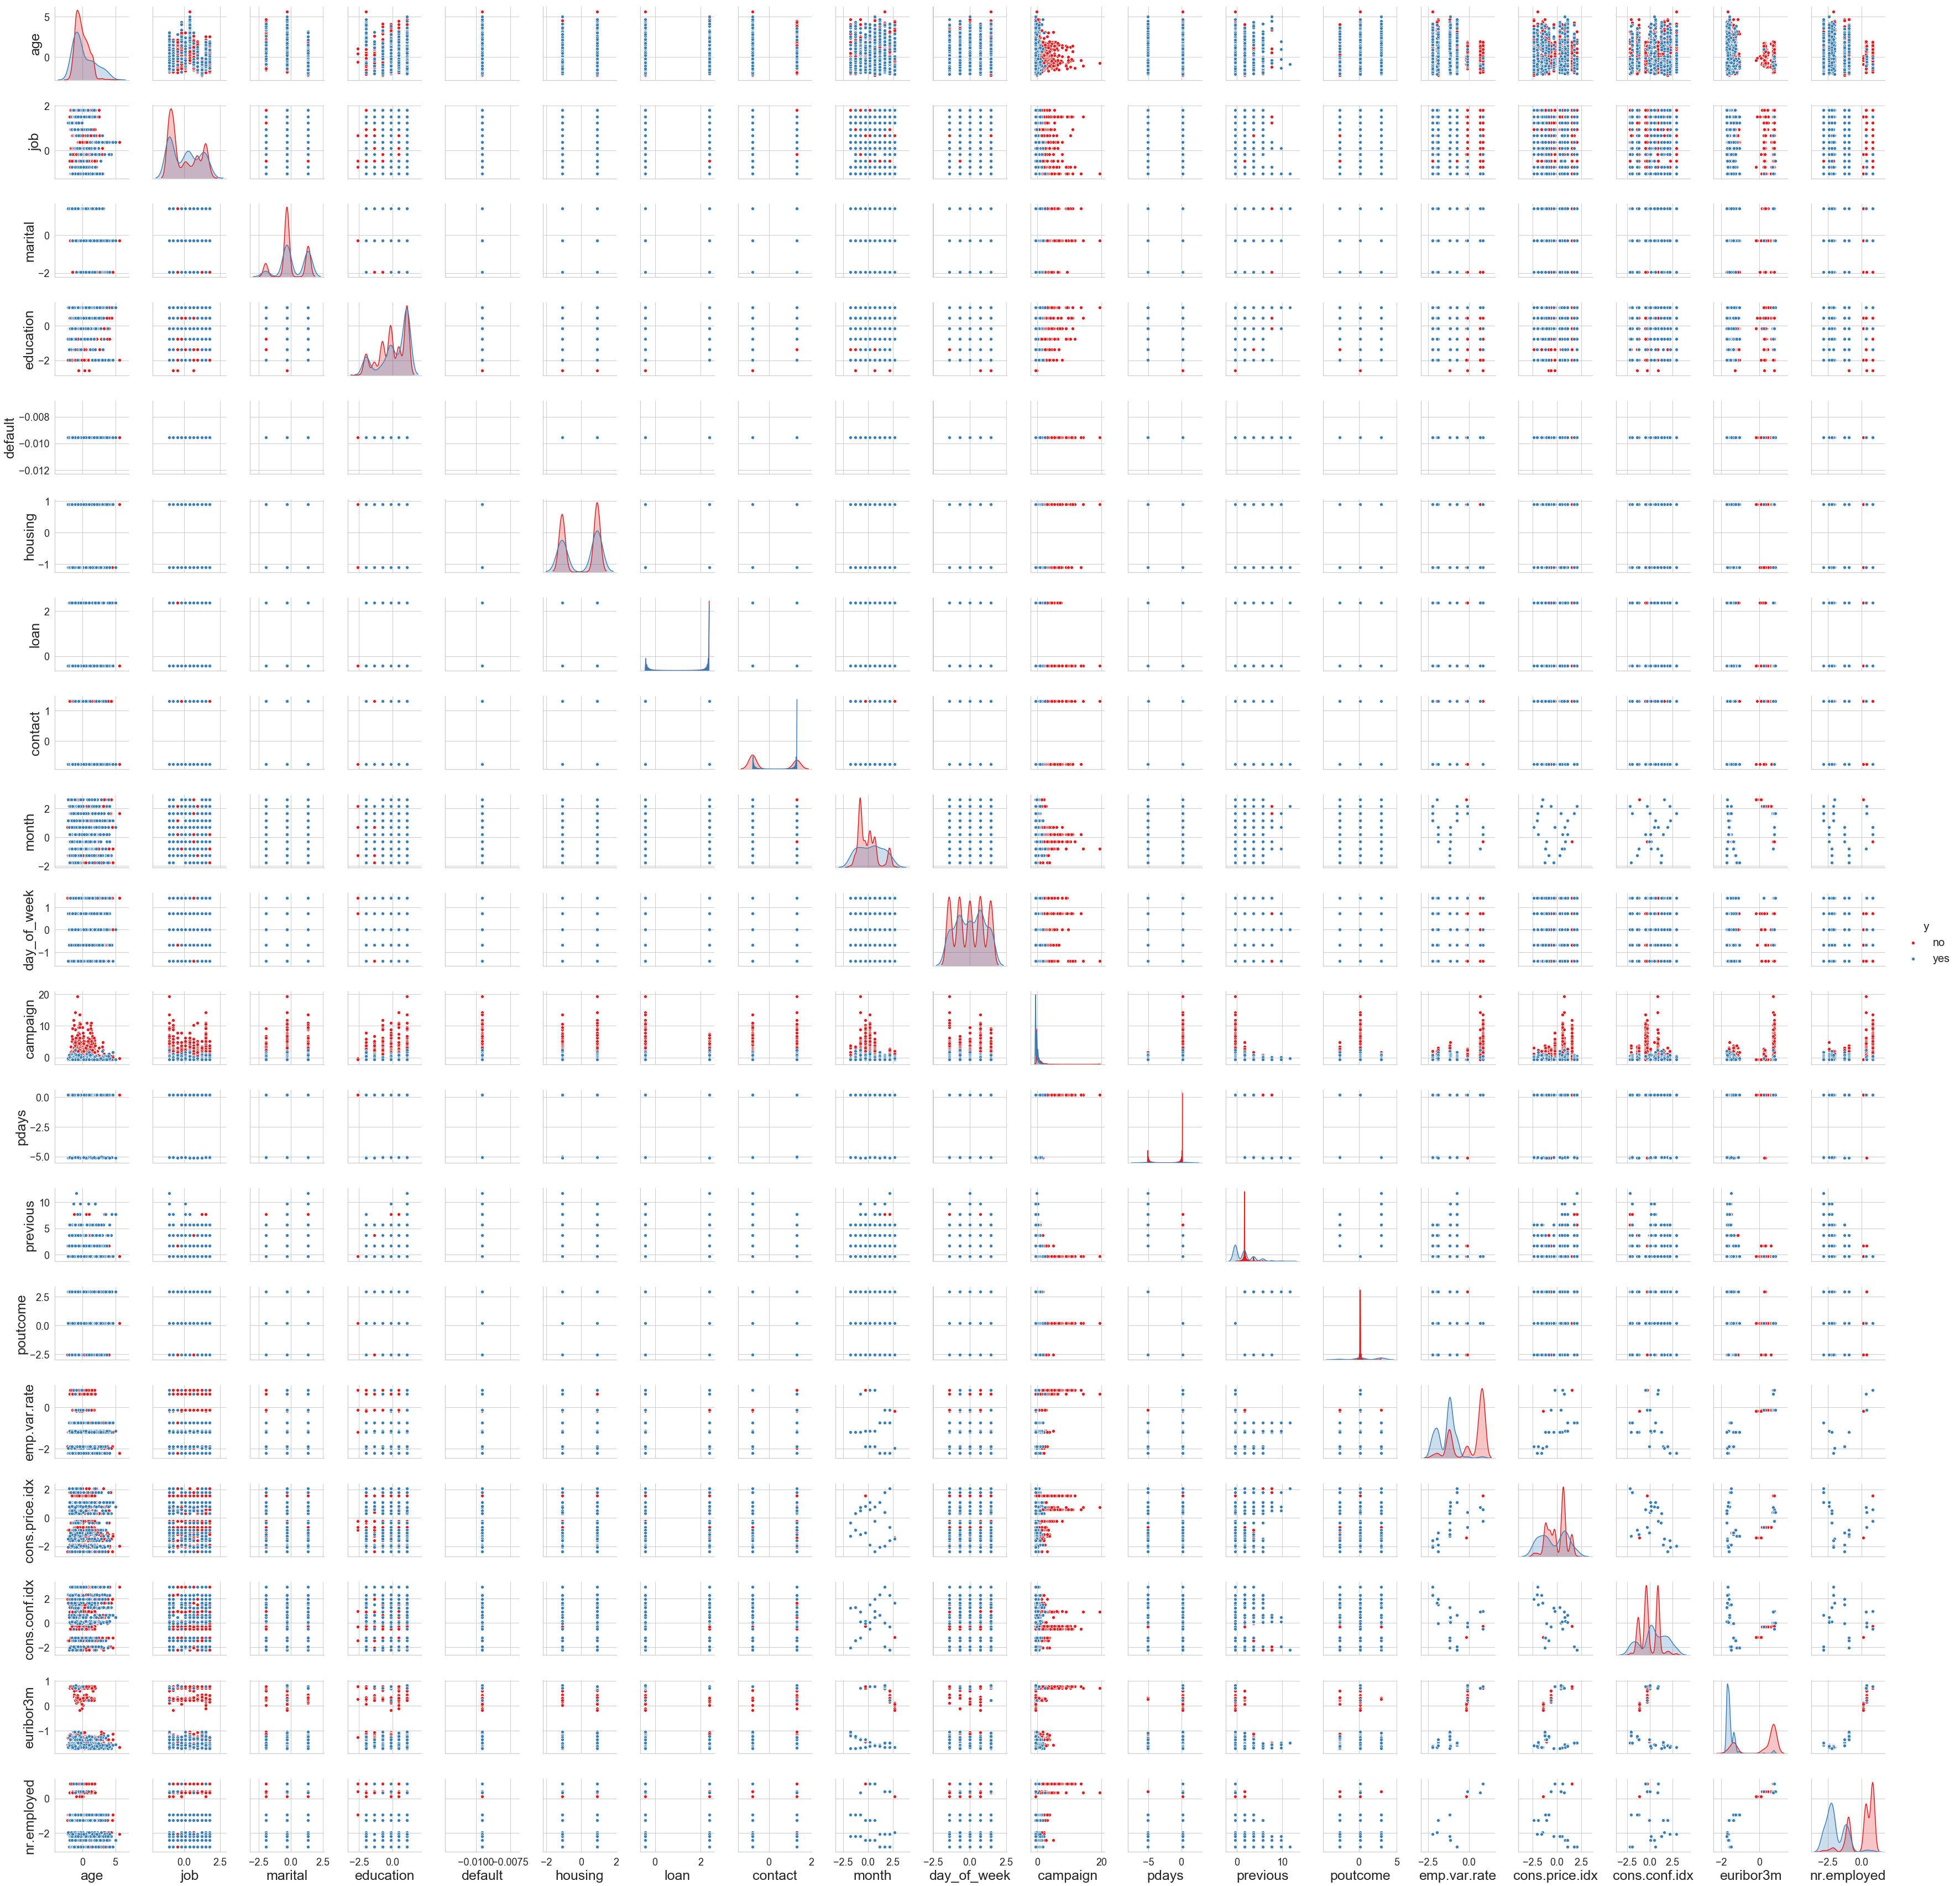

In [12]:
print("Please double-click the image to have a bigger visualization" + '\n' + "kNN Pairplot" + '\n')
sns.pairplot(df_knn, hue = 'y')

Please double-click the image to have a bigger visualization
SVM Pairplot



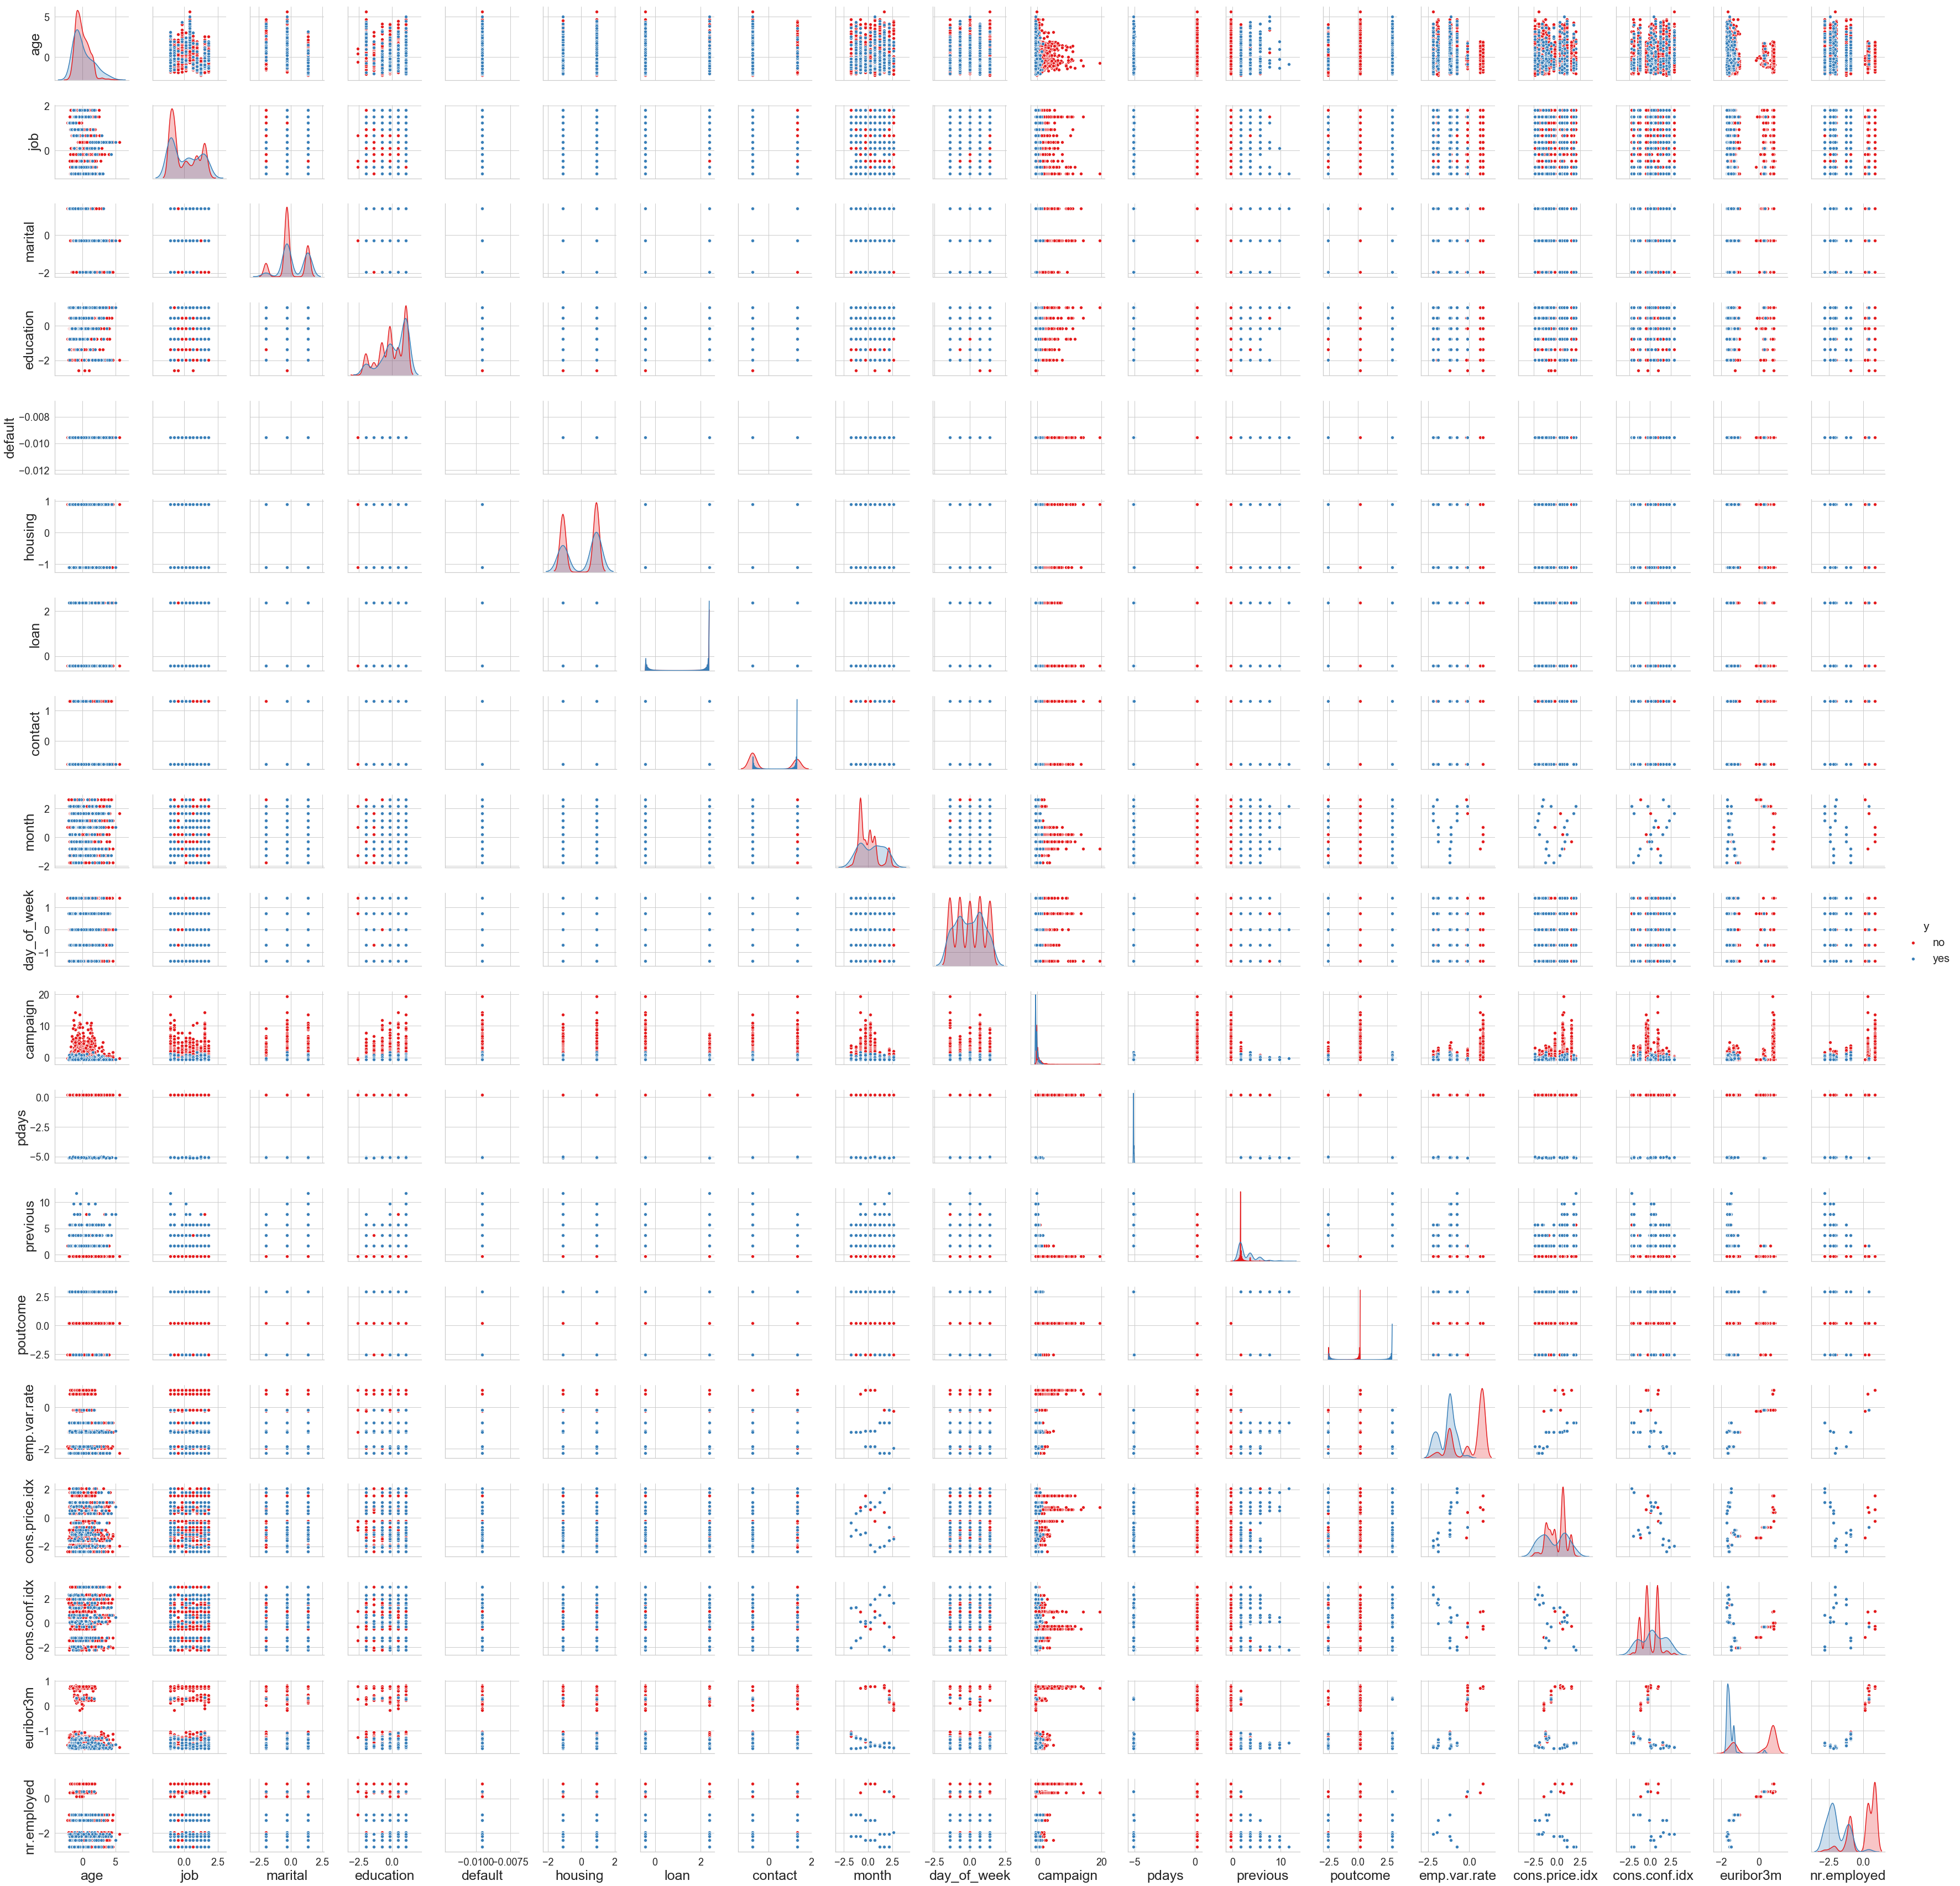

In [13]:
print("Please double-click the image to have a bigger visualization" + '\n' + "SVM Pairplot" + '\n')
sns.pairplot(df_svc, hue = 'y')

Text(0.5, 1.0, 'SVM')

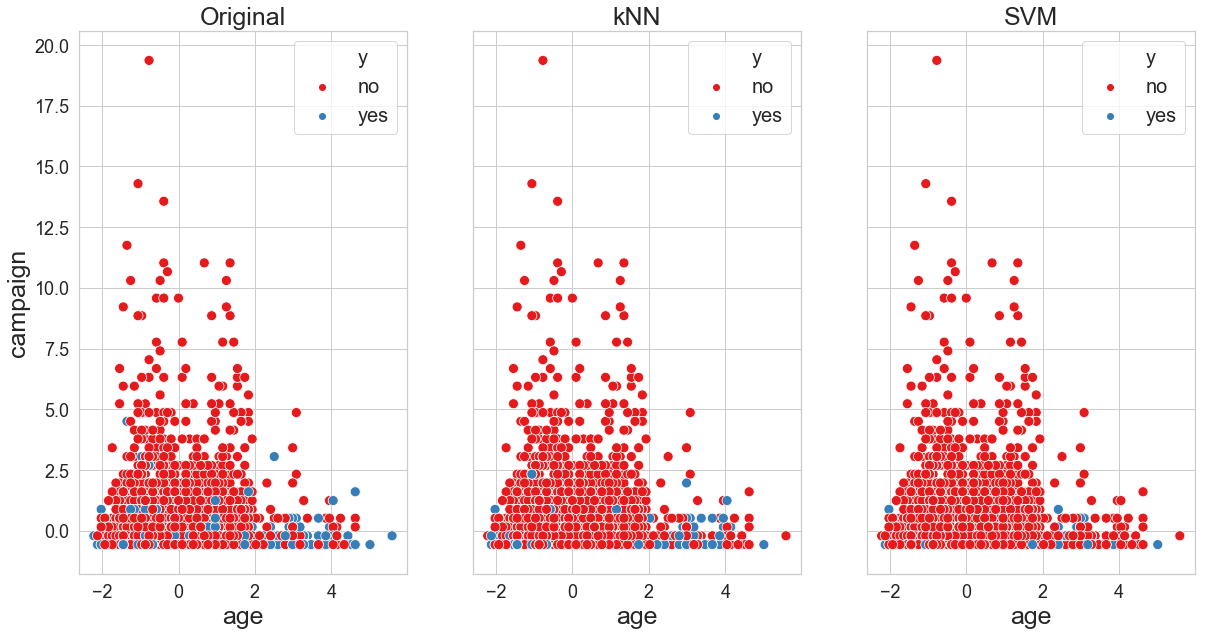

In [14]:
#Plotting Campaign vs Age
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,10))
g = sns.scatterplot(data=df_z, y="campaign", x="age", hue= 'y', ax=ax[0], s=100)
ax[0].set_title('Original')
sns.scatterplot(data=df_knn, y="campaign", x="age", hue= 'y', ax=ax[1], s=100)
ax[1].set_title('kNN')
sns.scatterplot(data=df_svc, y="campaign", x="age", hue= 'y', ax=ax[2], s=100)
ax[2].set_title('SVM')

The scatter plots above show the “campaign” vs “age” behavior of the data using the original dataset and the kNN and SVM models. The plot with the original dataset shows how the classes are overlapping on top of each other. It can be observed that the clients are not more prone to subscribe to a bank term deposit when the number of contacts in the current campaign increases. The pattern showing that if a client has decided not to subscribe to a bank term deposit it is not very likely that in the following campaigns it will decide to subscribe is common among all ages. 

The plot with the kNN results shows a similar behavior as the original but it has less class “yes” datapoints. Since both classes are overlapping and there are more class “no” datapoints than there are “yes” datapoints it is understandable that the algorithm chooses to classify most points as “no”. A region of interest is the one comprised between age 2 and 4 where a higher concentration of “yes” is present. It can be observed that some datapoints are wrongly classified as “yes” due to the high concentration of the class within this range.

The plot with the SVM results shows a high concentration of class ”no” and it is visible that there are no “yes” datapoints above 2.5 campaign. 


Text(0.5, 1.0, 'SVM')

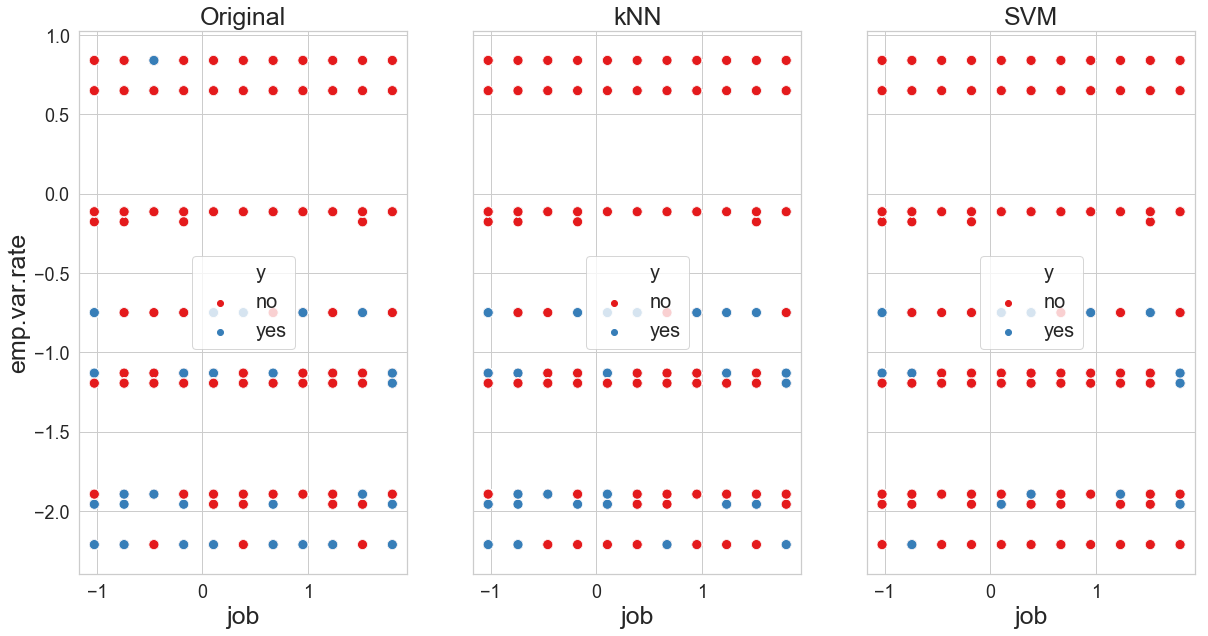

In [15]:
# Plotting campaign vs job
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,10))
sns.scatterplot(data=df_z, y="emp.var.rate", x="job", hue= 'y', ax=ax[0], s=100)
ax[0].set_title('Original')
sns.scatterplot(data=df_knn, y="emp.var.rate", x="job", hue= 'y', ax=ax[1], s=100)
ax[1].set_title('kNN')
sns.scatterplot(data=df_svc, y="emp.var.rate", x="job", hue= 'y', ax=ax[2], s=100)
ax[2].set_title('SVM')

The scatter plots above show the “emp.var.rate" vs “job” behavior of the data using the original dataset and the kNN and SVM models. All three plots show how it is more difficult for a client to subscribe a bank term deposit when the employment variation rate is high. (above -0.5). 

The plot with the SVM results misses to recognize that the lowest level of employment variation rate has a high rate of “yes”.

Text(0.5, 1.0, 'SVM')

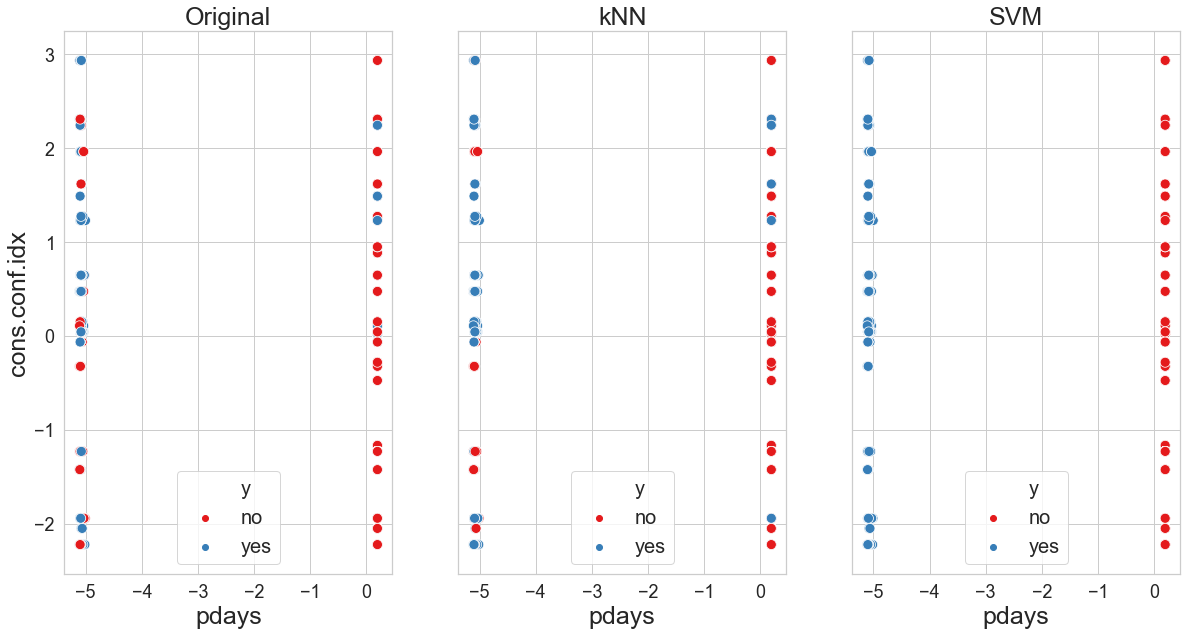

In [16]:
#Plotting Campaign vs Age
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,10))
g = sns.scatterplot(data=df_z, y="cons.conf.idx", x="pdays", hue= 'y', ax=ax[0], s=100)
ax[0].set_title('Original')
sns.scatterplot(data=df_knn, y="cons.conf.idx", x="pdays", hue= 'y', ax=ax[1], s=100)
ax[1].set_title('kNN')
sns.scatterplot(data=df_svc, y="cons.conf.idx", x="pdays", hue= 'y', ax=ax[2], s=100)
ax[2].set_title('SVM')

These graphs show that the higher the value of pdays, the more likely a client is to subscribe to a bank term deposit, although it is due to a misrepresentation. The graphs show as if there were only two possible values for pdays but it is caused by the pdays value of 999 that was entered when a client was not previously contacted. This number is orders of magnitude bigger than the pdays values of clients that have been contacted before. The large difference between the values of the clients complicates the transformation of the data during the standardization. On the other hand, it has to be recalled that most of the “yes” datapoints come from clients that had not been contacted before, as shown in the campaign plot. The fact that these clients have a pdays value of 999, created the illusion that all the clients with a high value of this attribute would be a class “yes” datapoint.

## Dropping all non-categorical columns

The homework instruction states that all the non-continuous attributes should be dropped. The following models are training using categorical attributes exclusively.

In [17]:
feas = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact','month','poutcome','day_of_week']
df_num = df.drop(columns = feas)
# df_num = df.select_dtypes(include=['int', 'float64'])
df_num.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
X_num = df_num.iloc[:, :-1].values
y_num = df_num.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_num = StandardScaler()
cols_num = df_num.columns
cols_num = cols_num[:-1] 
X_train_num = pd.DataFrame(sc.fit_transform(X_train_num), columns=cols_num)
X_test_num = pd.DataFrame(sc.transform(X_test_num), columns=cols_num)

##--KNN
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train_num, y_train_num)

y_pred_num_knn = classifier.predict(X_test_num)


err = (y_test != y_pred_num_knn).sum()/len(y_test_num)
acc = 1-err
print("The accuracy of the kNN model using numerical features exclusively is " 
      + str(round(acc,2)) + " and the error is " + str(round(err,2)) + "\n" + " 'yes'  'no'")

#Evaluating
print(metrics.confusion_matrix(y_test_num, y_pred_num_knn))
print(metrics.classification_report(y_test_num, y_pred_num_knn))


##--SVM

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_num, y_train_num)

# Predicting the Test set results
y_pred_num_svc = classifier.predict(X_test_num)
err = (y_test_num != y_pred_num_svc).sum()/len(y_test_num)
acc = 1-err
print("The accuracy of the SVM model using numerical features exclusively is " 
      + str(round(acc,2)) + " and the error is " + str(round(err,2)) + "\n" + "'yes'  'no'")

#Evaluating
print(metrics.confusion_matrix(y_test_num, y_pred_num_svc))
print(metrics.classification_report(y_test_num, y_pred_num_svc))

The accuracy of the kNN model using numerical features exclusively is 0.89 and the error is 0.11
 'yes'  'no'
[[7073  237]
 [ 670  258]]
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.52      0.28      0.36       928

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238

The accuracy of the SVM model using numerical features exclusively is 0.9 and the error is 0.1
'yes'  'no'
[[7209  101]
 [ 742  186]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7310
         yes       0.65      0.20      0.31       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Dropping all categorical features did not have a significant impact in the model’s performance.

## For Fun
Support Vector Classification with a Radial Based Function (RBF) Kernel.

In [19]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_num, y_train_num)

# Predicting the Test set results
y_pred_num_svc = classifier.predict(X_test_num)
err = (y_test_num != y_pred_num_svc).sum()/len(y_test_num)
acc = 1-err
print("The accuracy of the SVM model using an RBF kernel and numerical features exclusively is " 
      + str(round(acc,2)) + " and the error is " + str(round(err,2)) + "\n" + "'yes'  'no'")

#Evaluating
print(metrics.confusion_matrix(y_test_num, y_pred_num_svc))
print(metrics.classification_report(y_test_num, y_pred_num_svc))

The accuracy of the SVM model using an RBF kernel and numerical features exclusively is 0.9 and the error is 0.1
'yes'  'no'
[[7237   73]
 [ 758  170]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.70      0.18      0.29       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



Applying the SVM with a RBF Kernel did not have a significant impact in the model's performance. It had a slight positive impact on the precision of the "yes" class and the f1-score of the "no" class, but had a negative impact in the recall and f1-score of the "yes" class.  

## Bibliography

[1] 	University of California, Irvine, "UCI Machine Learning Repository: Bank Marketing Data Set," [Online]. Available: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. [Accessed 26 Feb 2019].

[2] 	W. McKinney, "pandas: powerful Python data analysis toolkit," 06 08 2018. [Online]. Available: http://pandas.pydata.org/pandas-docs/stable/. [Accessed 09 January 2019].

[3] 	F. Pedregosa, G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, P. Prettenhofer, R. Weiss, V. Dubourg, V, J. erplas, A. Passos, D. Cournapeau, M. Brucher, M. Perrot and E. Duchesnay, "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825-2830, 2011. 

[4] 	Datacamp, "Data Scientist with Python Track | DataCamp," [Online]. Available: https://www.datacamp.com/tracks/data-scientist-with-python. [Accessed 09 01 2019].

[5] 	K. P. Shung, "Accuracy, Precision, Recall and F1? - Towards Data Science," Towards Data Science, 15 Mar 2018. [Online]. Available: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. [Accessed 27 Feb 2019].

[6] 	B. Welsh, "python recipe: read file, find pattern, print matches. Palewire," Palewire, 14 04 2008. [Online]. Available: https://palewi.re/posts/2008/04/14/python-recipe-read-a-file-search-for-a-pattern-print-your-matches/. [Accessed 22 01 2019].


